## data analysis with r for airport delay reasons

In [5]:
# Load tidyverse
library(tidyverse)

In [6]:
#read data 
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"
# download the file
download.file(url, destfile = "lax_to_jfk.tar.gz")
# untar the file so we can get the csv only
untar("lax_to_jfk.tar.gz", tar = "internal")
# read_csv only 
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                     col_types = cols(
                      'DivDistance' = col_number(),
                      'DivArrDelay' = col_number()
                      ))

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

In [7]:
# show the first n = 3 rows
head(sub_airline, 3)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,...,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,...,2,NA,NA,NA,NA,NA,-1,0,NA,NA
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,...,0,NA,NA,NA,NA,NA,4,4,NA,NA
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,...,0,NA,NA,NA,NA,NA,-8,0,NA,NA


In [8]:
#make summurization for carrierdelay in each reporting air line
sub_airline %>% filter(Month == 1) %>%
group_by(Reporting_Airline)%>%
summarize(avg_carrier_delay =
mean(CarrierDelay, na.rm = TRUE))

Reporting_Airline,avg_carrier_delay
AA,24.625000
AS,32.000000
B6,25.500000
DL,0.000000
HP,0.000000
PA (1),NaN
TW,NaN
UA,0.000000
VX,2.333333


In [ ]:
#check each column type and name and data accros
glimpse(sub_airline)

In [9]:
# count number of missing value in DivArrDelay
sub_airline %>%
summarize(count=sum(is.na(DivArrDelay)))
          

count
2855


In [10]:
dim(sub_airline)

[1] 2855   21

In [11]:
#to find number  of missing values in each columns
map(sub_airline,~sum(is.na(.)))

$Month
[1] 0

$DayOfWeek
[1] 0

$FlightDate
[1] 0

$Reporting_Airline
[1] 0

$Origin
[1] 0

$Dest
[1] 0

$CRSDepTime
[1] 0

$CRSArrTime
[1] 0

$DepTime
[1] 0

$ArrTime
[1] 0

$ArrDelay
[1] 0

$ArrDelayMinutes
[1] 0

$CarrierDelay
[1] 2486

$WeatherDelay
[1] 2486

$NASDelay
[1] 2486

$SecurityDelay
[1] 2486

$LateAircraftDelay
[1] 2486

$DepDelay
[1] 0

$DepDelayMinutes
[1] 0

$DivDistance
[1] 2855

$DivArrDelay
[1] 2855

In [12]:
# check each columns data type 
sapply(sub_airline,typeof)

Month         DayOfWeek        FlightDate Reporting_Airline 
         "double"          "double"          "double"       "character" 
           Origin              Dest        CRSDepTime        CRSArrTime 
      "character"       "character"       "character"       "character" 
          DepTime           ArrTime          ArrDelay   ArrDelayMinutes 
      "character"       "character"          "double"          "double" 
     CarrierDelay      WeatherDelay          NASDelay     SecurityDelay 
         "double"          "double"          "double"          "double" 
LateAircraftDelay          DepDelay   DepDelayMinutes       DivDistance 
         "double"          "double"          "double"          "double" 
      DivArrDelay 
         "double"

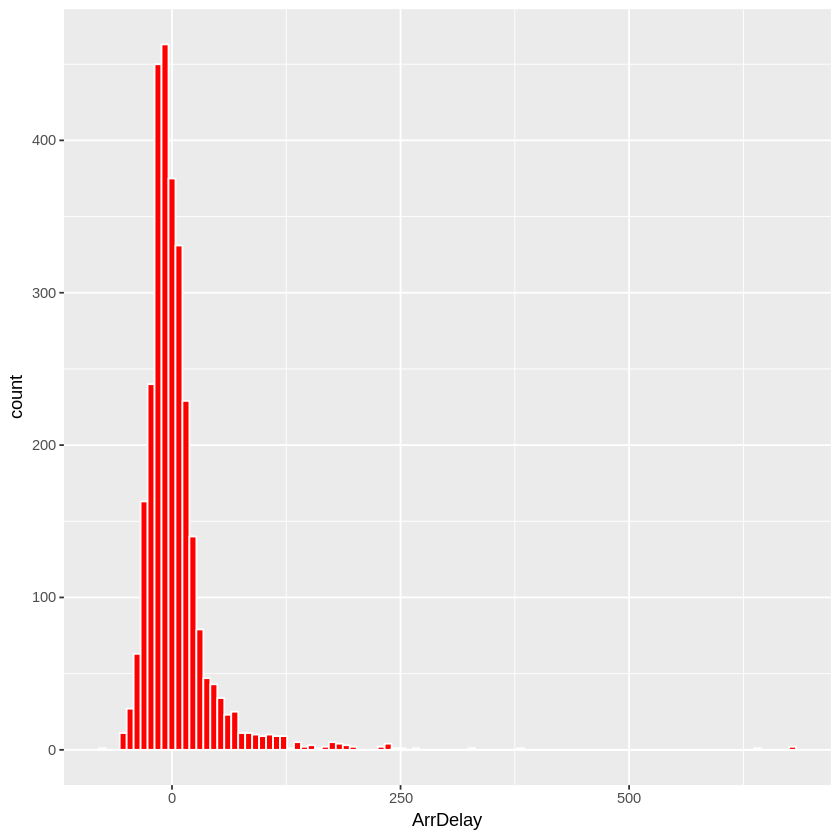

In [13]:
# check the distribution of values in arrdelay columns
ggplot(data = sub_airline,
mapping = aes(x = ArrDelay))+
geom_histogram(bins = 100, color = "white",fill = "red")

In [14]:
#create four bins from values in arrdealay and stor it in new column 
head(sub_airline %>%
 mutate(quantile_rank =
ntile(sub_airline$ArrDelay,4
)))

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay,quantile_rank
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,...,NA,NA,NA,NA,NA,-1,0,NA,NA,3
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,...,NA,NA,NA,NA,NA,4,4,NA,NA,1
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,...,NA,NA,NA,NA,NA,-8,0,NA,NA,2
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,...,NA,NA,NA,NA,NA,7,7,NA,NA,2
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,...,NA,NA,NA,NA,NA,-4,0,NA,NA,2
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,...,NA,NA,NA,NA,NA,2,2,NA,NA,1


In [16]:
#used to split each value in reporting _airline to columns with value direct in array column and the other values in none
head(sub_airline %>%
spread(Reporting_Airline,
ArrDelay))

Month,DayOfWeek,FlightDate,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelayMinutes,...,DivArrDelay,AA,AS,B6,DL,HP,PA (1),TW,UA,VX
3,5,2003-03-28,LAX,JFK,2210,0615,2209,0617,2,...,NA,NA,NA,NA,NA,NA,NA,NA,2,NA
11,4,2018-11-29,LAX,JFK,1045,1912,1049,1851,0,...,NA,NA,-21,NA,NA,NA,NA,NA,NA,NA
8,5,2015-08-28,LAX,JFK,0805,1634,0757,1620,0,...,NA,NA,NA,NA,NA,NA,NA,NA,-14,NA
4,7,2003-04-20,LAX,JFK,2205,0619,2212,0616,0,...,NA,NA,NA,NA,-3,NA,NA,NA,NA,NA
11,3,2005-11-30,LAX,JFK,0840,1653,0836,1640,0,...,NA,NA,NA,NA,NA,NA,NA,NA,-13,NA
4,1,1992-04-06,LAX,JFK,1450,2308,1452,2248,0,...,NA,NA,NA,NA,NA,NA,NA,NA,-20,NA


In [ ]:

avg_delays <- sub_airline %>%
group_by(Reporting_Airline, DayOfWeek) %>%
summarize(mean_delays =
mean(ArrDelayMinutes))